### Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the file

In [21]:
df = pd.read_csv('./pokemon_data.csv')
# df.head()

### Add a total to each Pokemon and restructure DataFrame

In [22]:
# print(df.columns.to_list().index('HP'))
df['Total'] = df.iloc[:, df.columns.to_list().index('HP'):df.columns.to_list().index('Speed')+1].sum(axis=1)
cols = list(df.columns.values)
df = df[cols[0:4] + [cols[-1]] + cols[4:12]]
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Box and Whiskers of "Total" across all Types

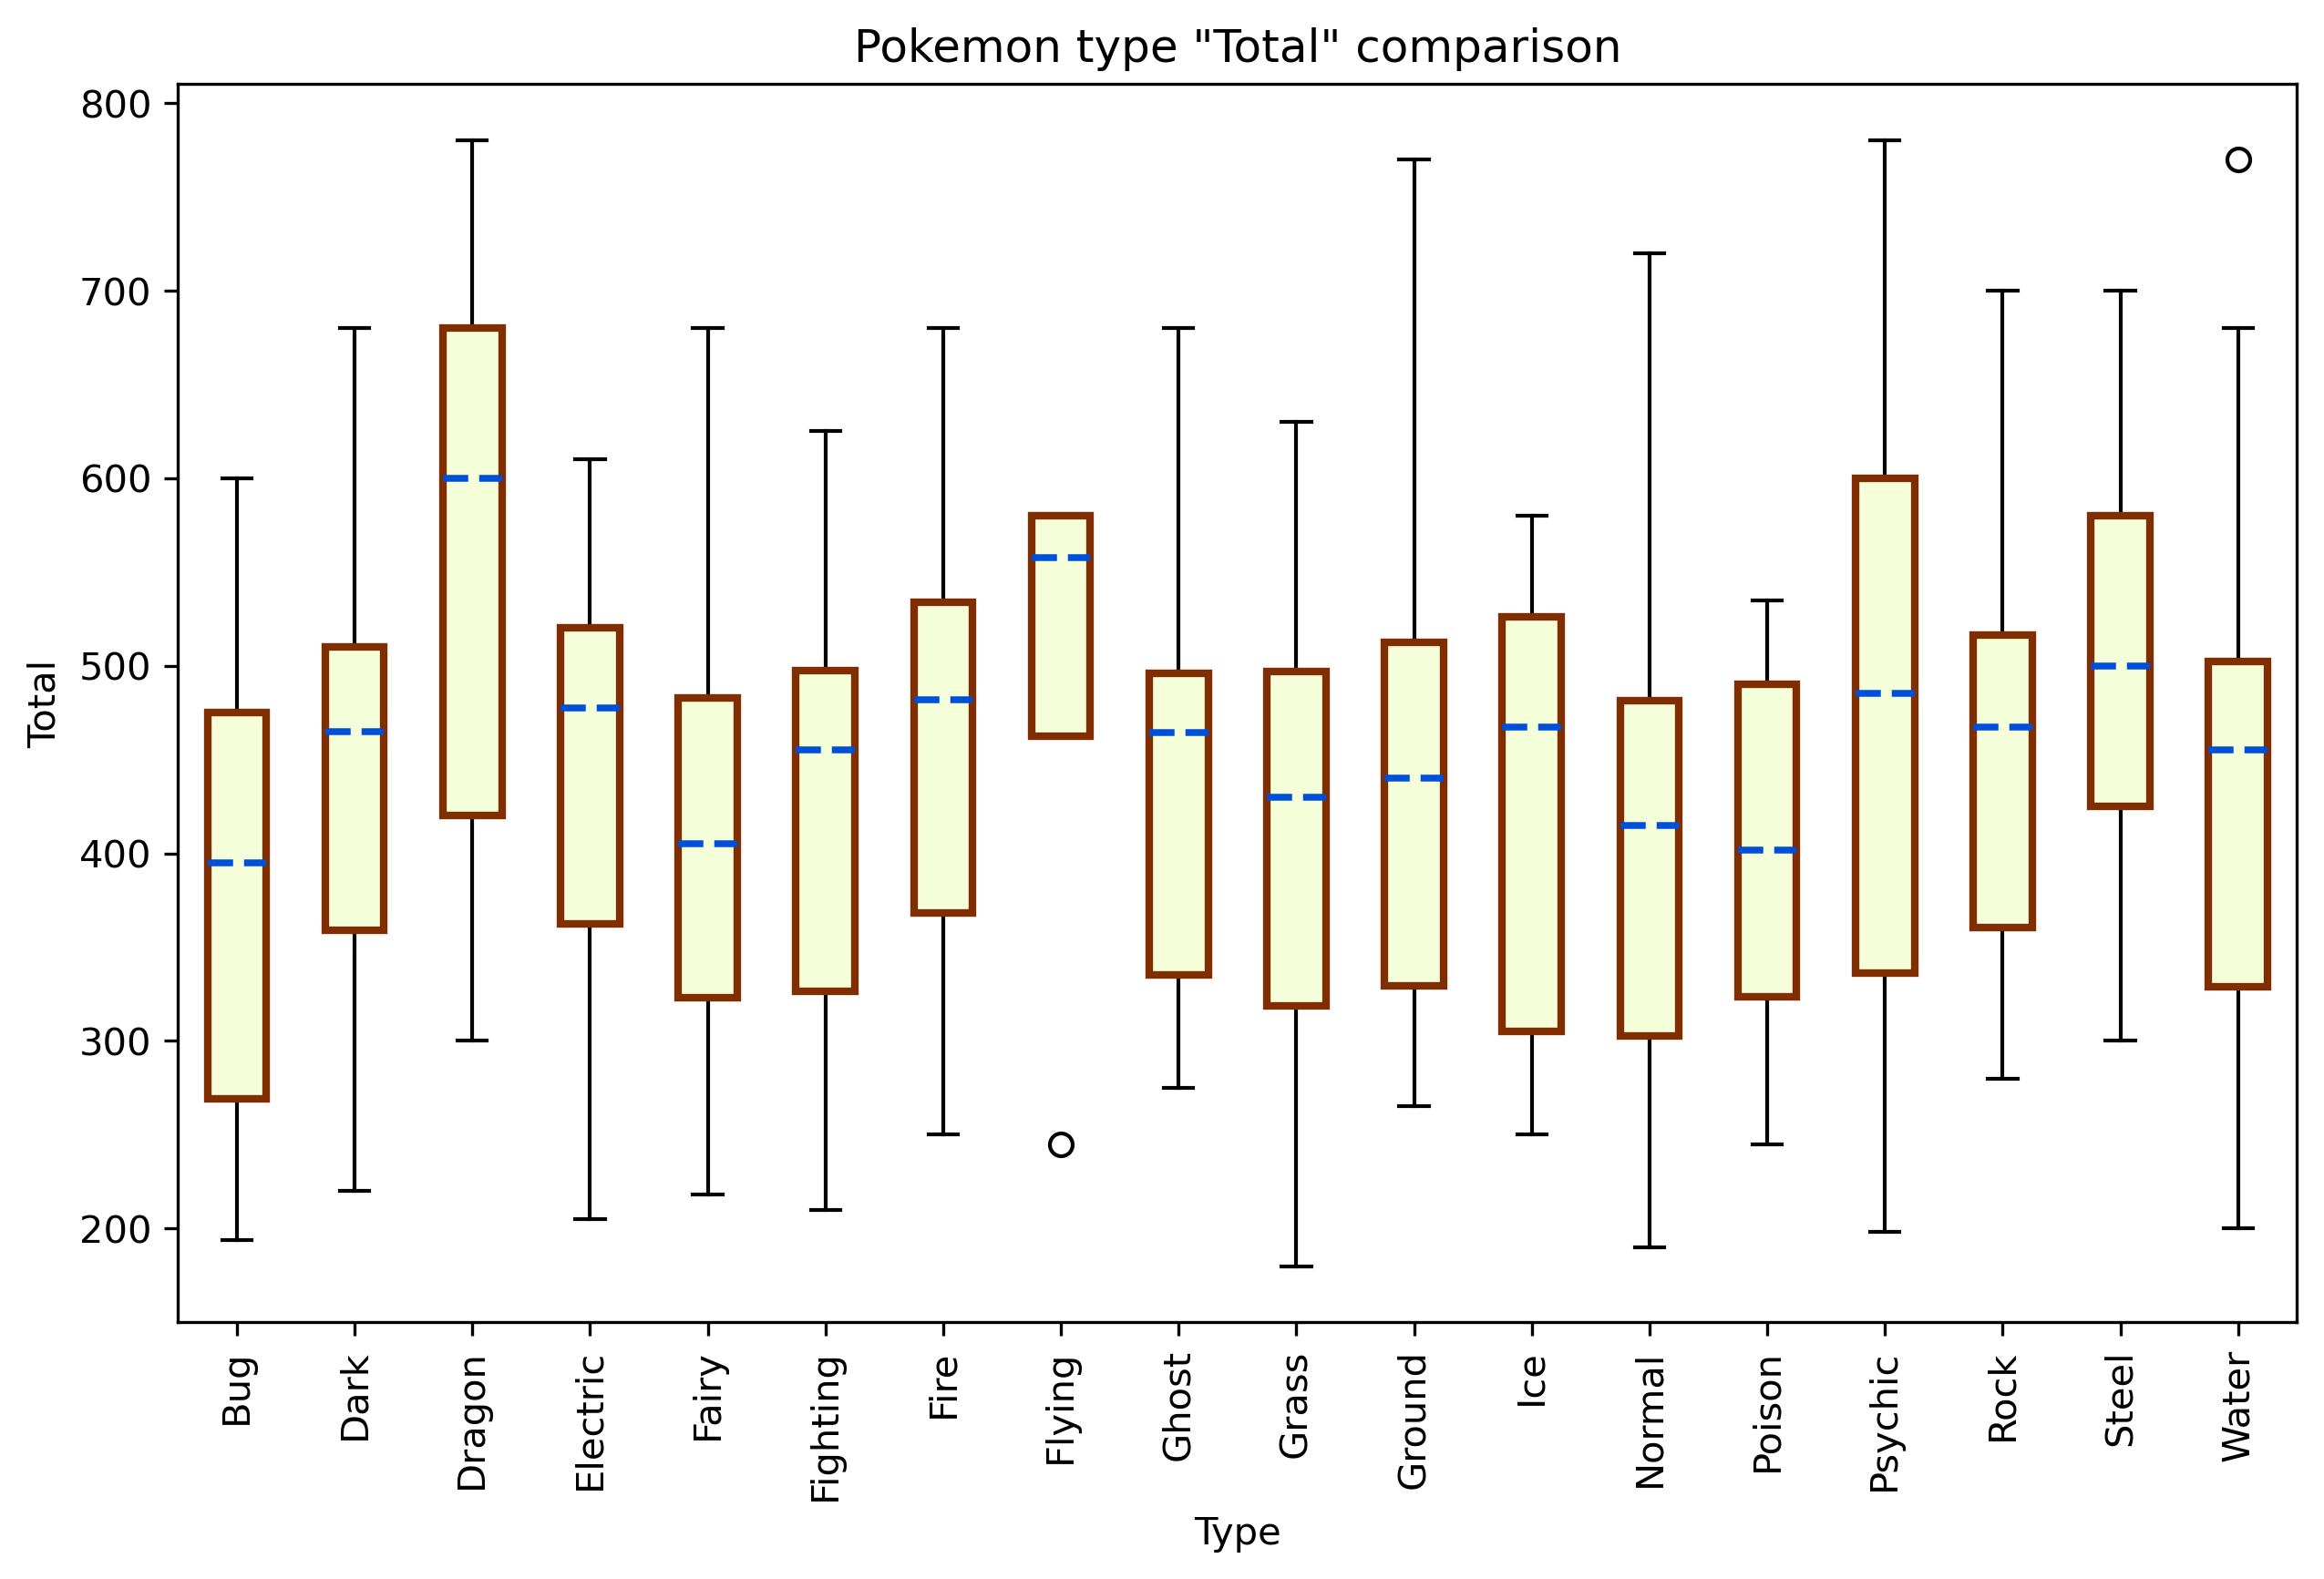

In [23]:
Bug = df.loc[df['Type 1'] == 'Bug']['Total']
Dark = df.loc[df['Type 1'] == 'Dark']['Total']
Dragon = df.loc[df['Type 1'] == 'Dragon']['Total']
Electric = df.loc[df['Type 1'] == 'Electric']['Total']
Fairy = df.loc[df['Type 1'] == 'Fairy']['Total']
Fighting = df.loc[df['Type 1'] == 'Fighting']['Total']
Fire = df.loc[df['Type 1'] == 'Fire']['Total']
Flying = df.loc[df['Type 1'] == 'Flying']['Total']
Ghost = df.loc[df['Type 1'] == 'Ghost']['Total']
Grass = df.loc[df['Type 1'] == 'Grass']['Total']
Ground = df.loc[df['Type 1'] == 'Ground']['Total']
Ice = df.loc[df['Type 1'] == 'Ice']['Total']
Normal = df.loc[df['Type 1'] == 'Normal']['Total']
Poison = df.loc[df['Type 1'] == 'Poison']['Total']
Psychic = df.loc[df['Type 1'] == 'Psychic']['Total']
Rock = df.loc[df['Type 1'] == 'Rock']['Total']
Steel = df.loc[df['Type 1'] == 'Steel']['Total']
Water = df.loc[df['Type 1'] == 'Water']['Total']

values = [Bug, Dark, Dragon, Electric, Fairy, 
          Fighting, Fire, Flying, Ghost, Grass, 
          Ground, Ice, Normal, Poison, Psychic, 
          Rock, Steel, Water]

labels = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 
          'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 
          'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 
          'Rock', 'Steel', 'Water']

medianprops = dict(linestyle='--', linewidth=1.8, color='#004fd9')
plt.figure(figsize=(10,6), dpi=300)
boxes = plt.boxplot(values, labels=labels, patch_artist=True, medianprops=medianprops)
for box in boxes['boxes']:
    box.set(color='#802d00', linewidth=2)
    box.set(facecolor='#f4ffd9')
    
plt.xticks(rotation='vertical')
plt.title('Pokemon type "Total" comparison')
plt.ylabel('Total')
plt.xlabel('Type')
plt.show()

### Attempt to find efficient way of gathering data than above

In [24]:
# labels = df.groupby(['Type 1'])
# labels = list(labels.groups.keys())
# a = []
# for label in labels:
#     a = df.loc[df['Type 1'] == label]['Total']
# ??????
# look at gas problem 

### Bar Graph of how many Pokemon in each type

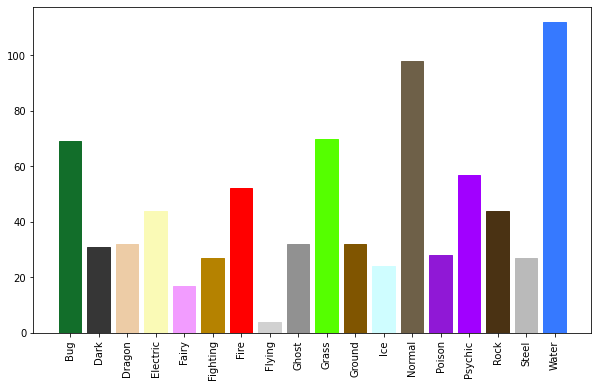

In [39]:
# Create a column for the counter
df['Counter'] = 1

# Enlarge the figure size for readability
plt.figure(figsize=(10,6))

# Rotate values along x axis for avoid clutterness 
plt.xticks(rotation='vertical')

# Manually handcoding the labels list 
# labels = ['bug', 'dark', 'dragon', 'electric', 'fairy', 
#           'fighting', 'fire', 'flying', 'ghost', 'grass', 
#           'ground', 'ice', 'normal', 'poison', 'psychic', 
#           'rock', 'steel', 'water']

# Group the pokemon types
pok_types = df.groupby(['Type 1'])
labels = pok_types.groups.keys()

# Value count
values = pok_types.count()['Counter']
bars = plt.bar(labels,values)
colors = ['#126e2a', '#363636', '#edcca6', '#fafab6', '#f29cff', 
          '#b58200', '#ff0000', '#d1d1d1', '#919191', '#55ff00', 
          '#805500', '#cffdff', '#6e6048', '#9018d6', '#a100ff', 
          '#4a3213','#bababa', '#3679ff']

# Change the colour according to each pokemon type
for bar in bars:
    bar.set_color(colors.pop(0))
plt.show()

### Pie chart comparing how many pokemon in each type

['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']


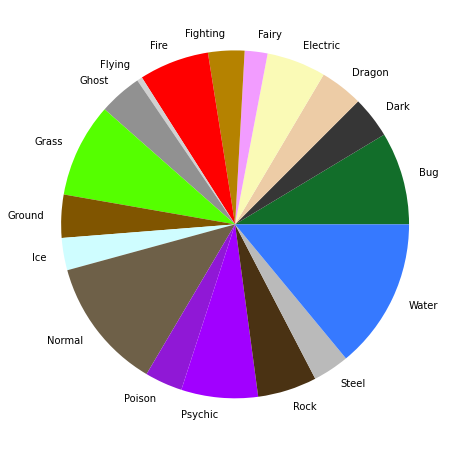

In [37]:
pok_types = df.groupby(['Type 1'])
labels = list(pok_types.groups.keys())
print(labels)
values = df.groupby(['Type 1']).count()['Counter']
plt.figure(figsize=(8,8))

colors = ['#126e2a', '#363636', '#edcca6', '#fafab6', '#f29cff', 
          '#b58200', '#ff0000', '#d1d1d1', '#919191', '#55ff00', 
          '#805500', '#cffdff', '#6e6048', '#9018d6', '#a100ff', 
          '#4a3213','#bababa', '#3679ff']
plt.pie(values, labels=labels, colors=colors)
plt.show()

### Graphs showing the top 30 and bottom 30 "Total" strengths

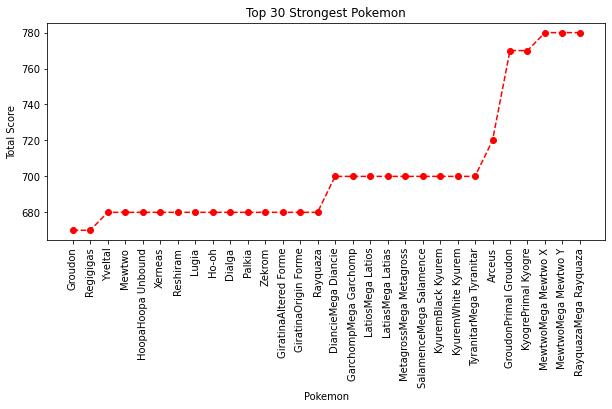

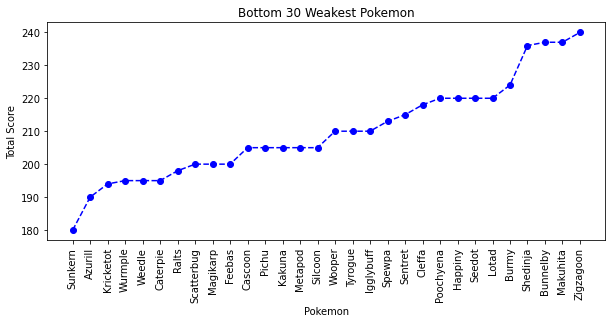

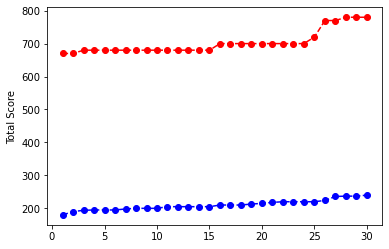

In [45]:
# Gathering the top 30 pokemon with the highest Total value
top30 = df.sort_values(['Total'], ascending=False)[0:30]
top30 = top30.sort_values(['Total'], ascending=True)
total = top30['Total']
pokemon = top30['Name']
plt.figure(figsize=(10,4))
plt.plot(pokemon, total, 'ro--', label='Total Strong')
plt.xticks(rotation='vertical')
plt.title('Top 30 Strongest Pokemon')
plt.xlabel('Pokemon')
plt.ylabel('Total Score')
plt.show()

bot30 = df.sort_values(['Total'], ascending=True)[0:30]
total2 = bot30['Total']
pokemon2 = bot30['Name']
plt.figure(figsize=(10,4))
plt.plot(pokemon2, total2, 'bo--', label='Total Weak')
plt.xticks(rotation='vertical')
plt.title('Bottom 30 Weakest Pokemon')
plt.xlabel('Pokemon')
plt.ylabel('Total Score')
plt.show()

x_axis = np.arange(1,31)

plt.plot(x_axis, total, 'ro--', label='Total Strong')
plt.plot(x_axis, total2, 'bo--', label='Total Weak')
plt.ylabel('Total Score')
plt.show()

### Finding the Percentage of Pokemon in each type group with an Attack above 110

### Finding the Percentage of Pokemon in each type group with an Attack above 110

In [29]:
att_110 = type_grp['Attack'].apply(lambda x: (x >= 110).sum())
att_110

Type 1
Bug         10
Dark         6
Dragon      17
Electric     4
Fairy        2
Fighting     9
Fire        11
Flying       1
Ghost        4
Grass        5
Ground      11
Ice          4
Normal      15
Poison       0
Psychic     10
Rock        14
Steel        8
Water       10
Name: Attack, dtype: int64

In [30]:
att_df = pd.concat([type_resp, att_110], axis='columns', sort=False)
att_df.rename(columns={'Type 1': 'Number of types', 'Attack': 'Above 110 Attack'}, inplace=True)
att_df['Pct 110 and Over'] = (att_df['Above 110 Attack']/att_df['Number of types']) * 100
att_df.sort_values(by='Pct 110 and Over', ascending=False, inplace=True)
att_df

,Number of types,Above 110 Attack,Pct 110 and Over
Dragon,32,17,53.125000
Ground,32,11,34.375000
Fighting,27,9,33.333333
Rock,44,14,31.818182
Steel,27,8,29.629630
Flying,4,1,25.000000
Fire,52,11,21.153846
Dark,31,6,19.354839
Psychic,57,10,17.543860
Ice,24,4,16.666667
